
Handwritten Digit Recognition Using PyTorch — Intro To Neural Networks

transforms.ToTensor = converts the image into numbers that are understanble by system


In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets , transforms
from torch import nn , optim

In [7]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5) , (0.5)),])

In [10]:
trainset = datasets.MNIST('/home/sujayeendra/Documents',download=True , train = True , transform=transform)

In [12]:
valset = datasets.MNIST('/home/sujayeendra/Documents',download = True , train = False , transform=transform)

In [13]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size=64 , shuffle=True)


In [14]:
valloader = torch.utils.data.DataLoader(valset , batch_size=64 , shuffle=True)

In [15]:
#Knowing the data
dataiter = iter(trainloader)
images , labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


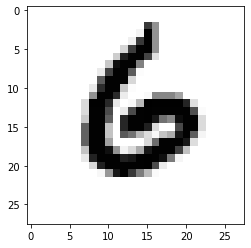

In [16]:
#Display a image
plt.imshow(images[0].numpy().squeeze(),cmap = 'gray_r')

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1 , num_of_images + 1):
  plt.subplot(6 , 10 , index)
  plt.axis("off")
  plt.imshow(images[index].numpy().squeeze() ,  cmap='gray_r')

In [23]:
#Build Neural Network
#Input Layer -> Hidden Layer -> Output Layer -> Result

input_size = 784
hidden_sizes = [128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size , hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0] , hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1] , output_size),
                      nn.LogSoftmax(dim = 1))

print(model)




Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [25]:
criterion = nn.NLLLoss()                            #defining loss function 
images , labels = next(iter(trainloader))           #getting sample data from train loader 
images = images.view(images.shape[0] , -1)          #flattening the image to one dim

logps = model(images)                               #push the data to model and log probability vector
loss  = criterion(logps , labels)                   #calculate loss between logps and labels size= [10 , 1]


In [26]:
#adjusting weights 
print("Before Backward Pass" , model[0].weight.grad) #none 
loss.backward()                                      #calculate the gradients 
print("after backward pass" , model[0].weight.grad)  #values obtained after backward pass


Before Backward Pass None
after backward pass tensor([[ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


In [31]:
optimizer = optim.SGD(model.parameters() , lr = 0.003 , momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
  running_loss = 0
  for images , labels in trainloader:
    #flatten
    images = images.view(images.shape[0] , -1)
    #training pass
    optimizer.zero_grad()

    output = model(images)
    loss = criterion(output ,  labels)

    #BP
    loss.backward()

    optimizer.step()
    running_loss+=loss.item()
  else:
    print("Epoch {} -Training loss : {} ".format(e, running_loss/len(trainloader)))
print("\nTraing Time (in minutes)=" , (time() - time0) / 60)


Epoch 0 -Training loss : 0.2857929187924115 
Epoch 1 -Training loss : 0.22458157419507055 
Epoch 2 -Training loss : 0.1820040400753588 
Epoch 3 -Training loss : 0.1514335314808751 
Epoch 4 -Training loss : 0.13152663369200376 
Epoch 5 -Training loss : 0.11437831557830418 
Epoch 6 -Training loss : 0.10117782245892515 
Epoch 7 -Training loss : 0.0903703984824309 
Epoch 8 -Training loss : 0.08181428565715215 
Epoch 9 -Training loss : 0.07597598986231538 
Epoch 10 -Training loss : 0.06771771920157839 
Epoch 11 -Training loss : 0.06275402547181971 
Epoch 12 -Training loss : 0.05822539836940751 
Epoch 13 -Training loss : 0.053328013585717565 
Epoch 14 -Training loss : 0.05055095782694119 

Traing Time (in minutes)= 2.729242829481761


In [33]:
#testing and evaluation
img = images[0].view(1,784)

with torch.no_grad():
  logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("predicted digit ", probab.index(max(probab)))



predicted digit  1


In [36]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9741
